## Example Wine data

In [11]:

# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA


<img src='./imgs/exe11.png' style=''>
<img src='./imgs/exe12.png' style=''>
<img src='./imgs/exe13.png' style=''>

## Fast look to data

In [2]:

head = ['Y']
for i in range(13):
    head.append(str('feature' + str(i+1)))

data = pd.read_csv('./data/wine.data', names=head, index_col=False)

In [3]:
data.head()

,Y,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          178 non-null    int64  
 1   feature1   178 non-null    float64
 2   feature2   178 non-null    float64
 3   feature3   178 non-null    float64
 4   feature4   178 non-null    float64
 5   feature5   178 non-null    int64  
 6   feature6   178 non-null    float64
 7   feature7   178 non-null    float64
 8   feature8   178 non-null    float64
 9   feature9   178 non-null    float64
 10  feature10  178 non-null    float64
 11  feature11  178 non-null    float64
 12  feature12  178 non-null    float64
 13  feature13  178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.describe()

,Y,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
X = data.drop('Y',axis=1) #features
y = data['Y'] #label

In [7]:
X.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Y, dtype: int64

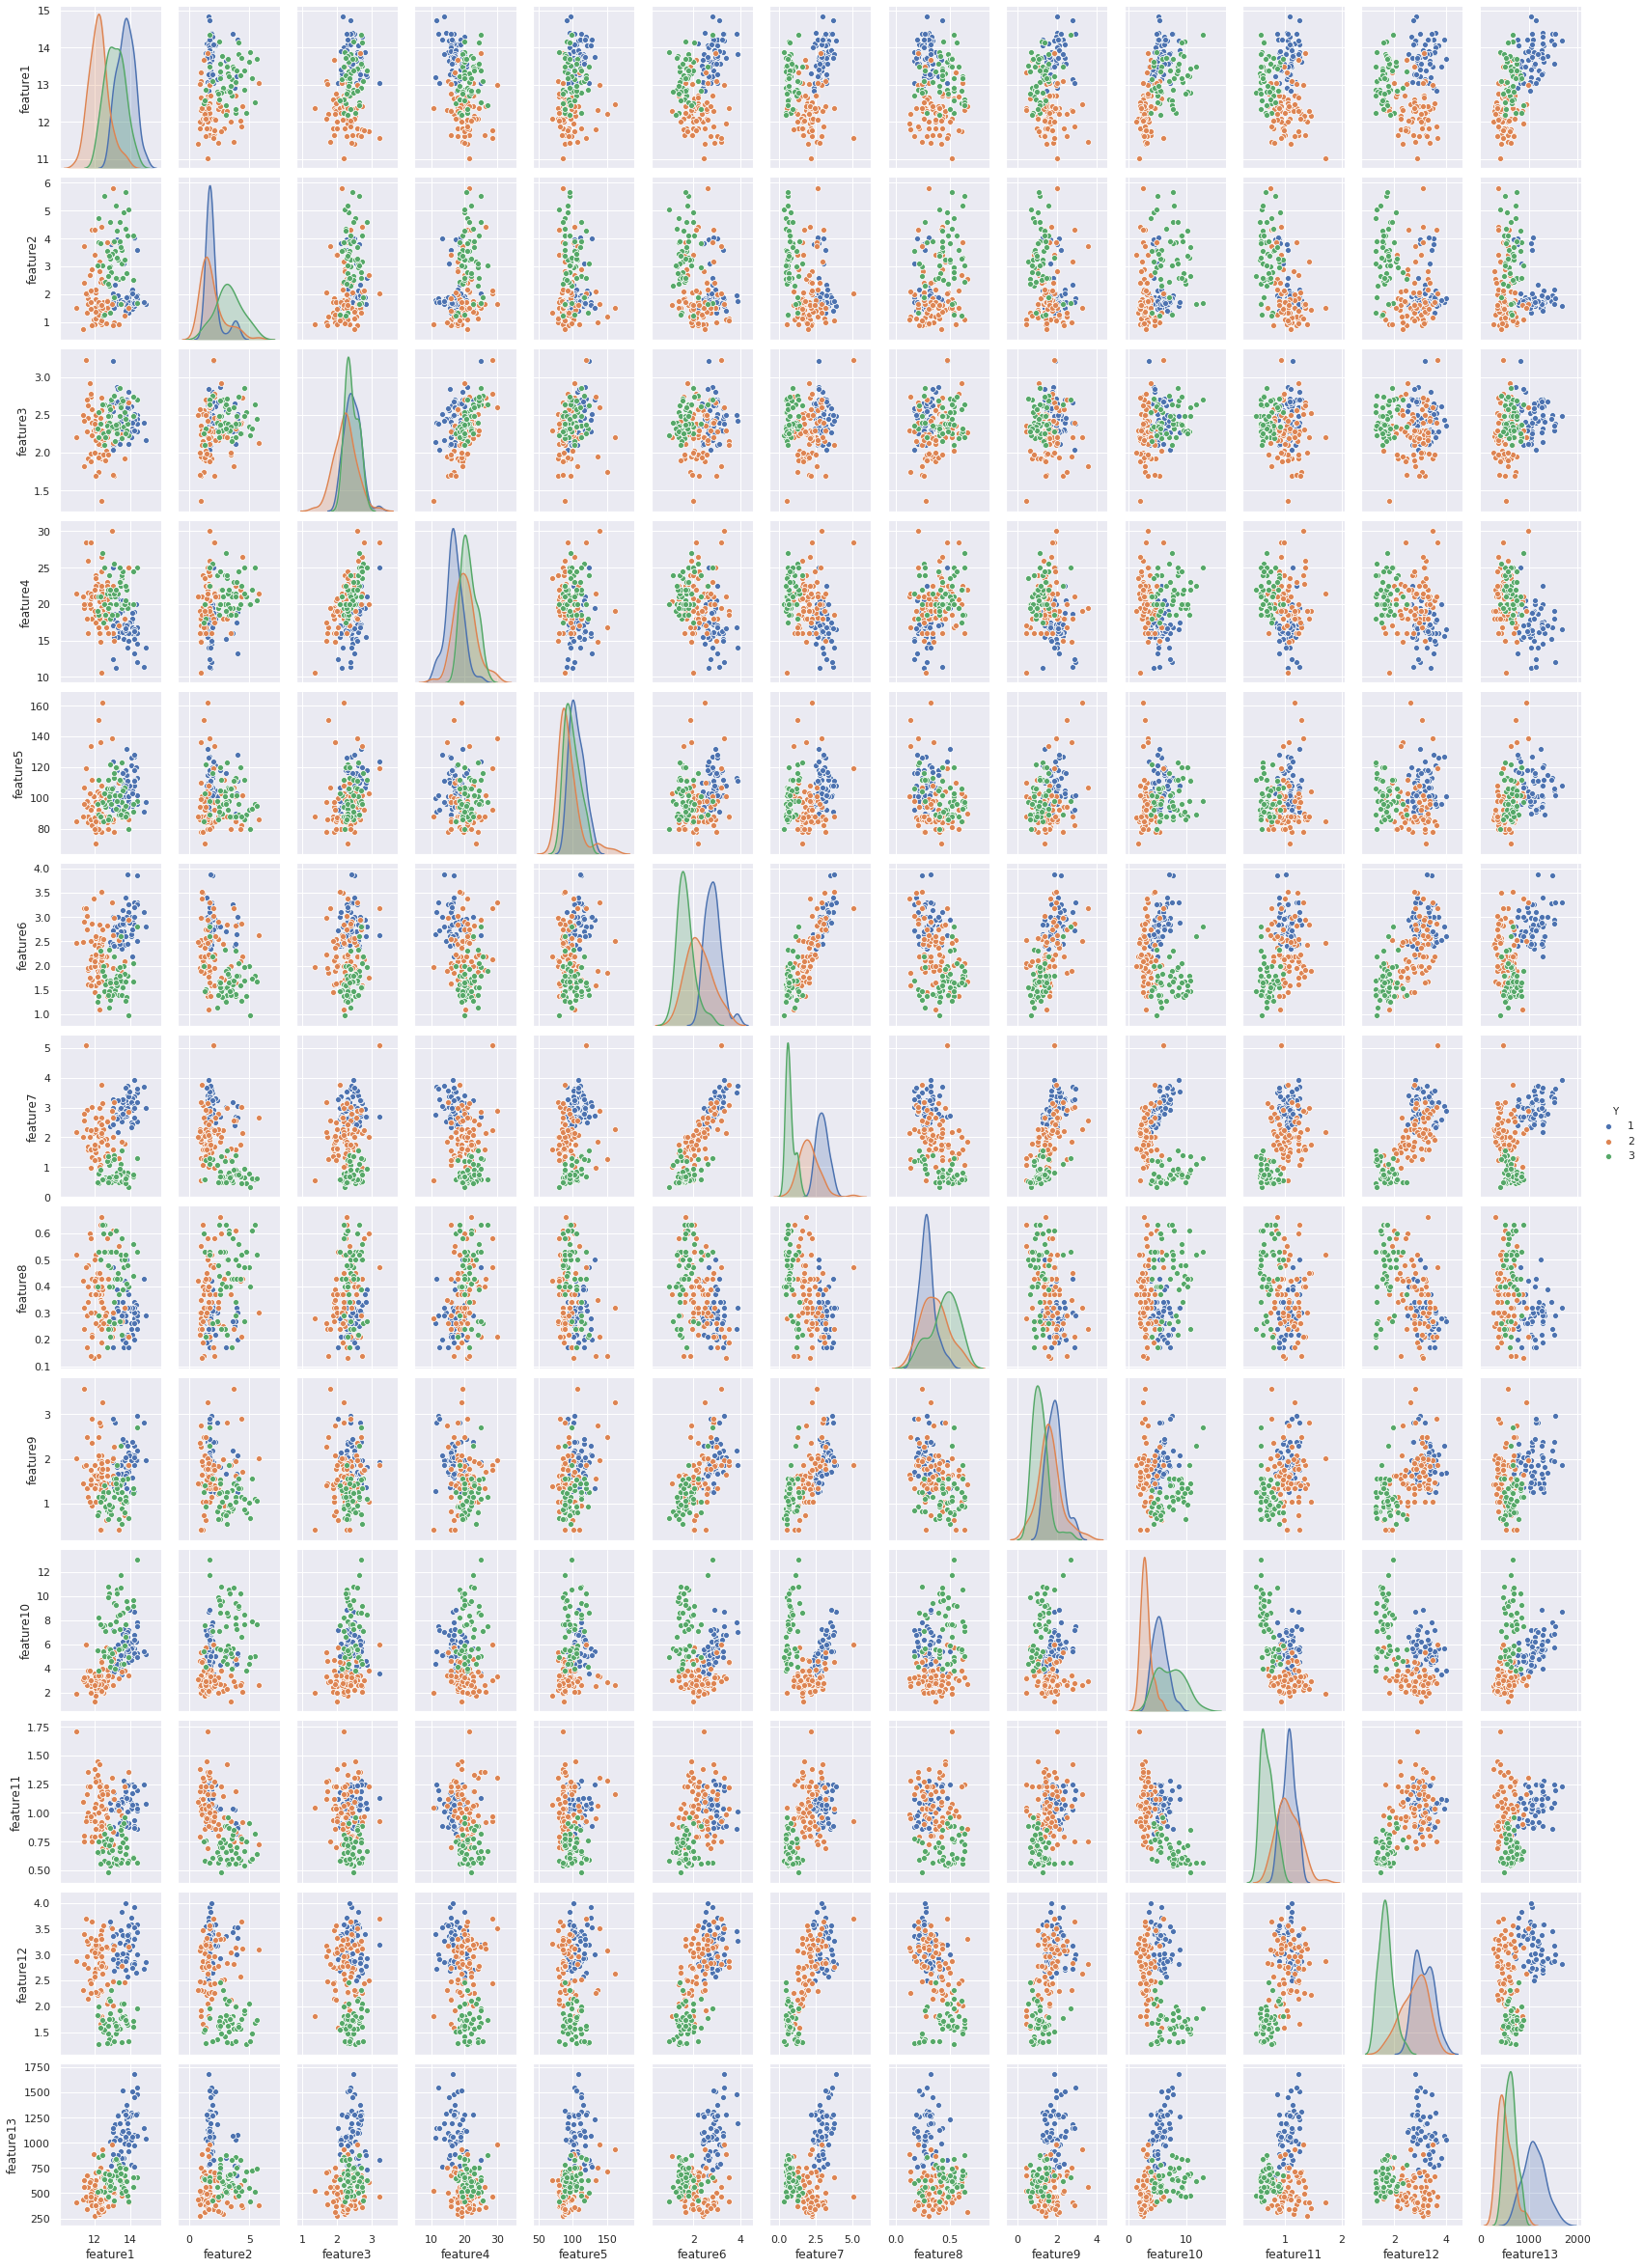

In [26]:

sns.set()
sns.pairplot(data, hue='Y', aspect=0.7)
plt.show()

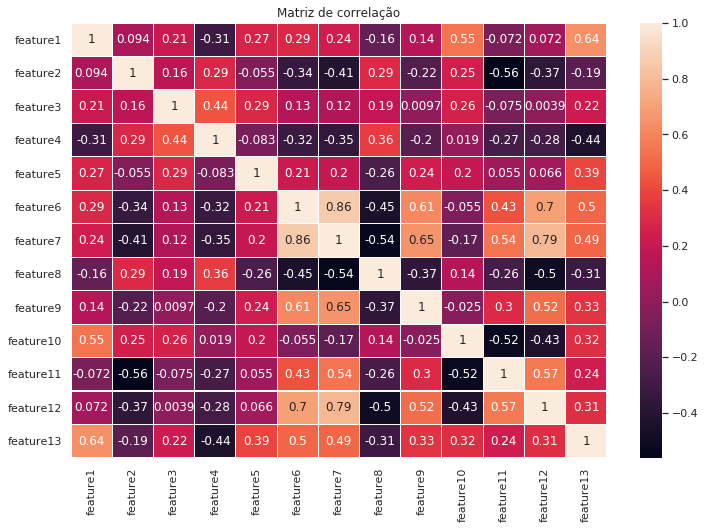

In [10]:

matCorr = np.corrcoef(X.T)

fig = plt.figure(figsize=(12,8))
axe = sns.heatmap(matCorr, annot=True, linewidth=0.1, xticklabels=X.columns, yticklabels=X.columns )
axe.set_title('Matriz de correlação')
plt.show()

## Using PCA

In [154]:

# Padronizando os dados


def standardizeDataFrame(X):
    '''
    Standardize Pandas DataFrame X
    
    :param X: DataFrame
    :return X_pad, X standardized
    '''
    X_pad = pd.DataFrame() # X padronizado: (x - mean)/std
    
    for col in range(len(X.columns)):
        pad = X.iloc[:,col]
        mean = pad.mean()
        std = pad.std()

        newCol = []

        for val in pad:
            new_value = (val - mean)/std
            newCol.append(new_value)

        df = pd.DataFrame(newCol, columns=[X.columns[col]])

        X_pad = pd.concat([X_pad, df], axis=1)
    return X_pad

X_pad = standardizeDataFrame(X)

In [156]:
X_pad.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [157]:

k = 2

pca = PCA(n_components=k)
pca.fit(X_pad)
data_pcaK = pca.transform(X_pad)


In [158]:

print('Shape data applying PCA K = {0}: {1}'.format(k,data_pcaK.shape))
print('Taxa da variância explicada: {0:.3f}'.format(np.cumsum(pca.explained_variance_ratio_)[-1]))


Shape data applying PCA K = 2: (178, 2)
Taxa da variância explicada: 0.554


Ou seja, os <b>2 primeiros PCs explicam, aproximadamente, 55% da variância total</b> dos dados, para os <b>5 primeiros teríamos próximo de 80%</b>.

In [159]:

# Criando novo data frame com os dados gerados usando PCA e suas labels

newDf = pd.DataFrame(data_pcaK, columns=['feat1','feat2'])
newDf = pd.concat([df1, data['Y']], axis=1)

newDf

,feat1,feat2,Y
0,3.586510,-0.896937,1
1,2.389383,0.384108,1
2,2.910292,-0.782256,1
3,4.584779,-2.426618,1
4,0.992776,-0.477055,1
...,...,...,...
173,-2.905327,-2.784238,3
174,-2.238510,-2.176239,3
175,-2.101475,-3.223728,3
176,-1.867588,-2.754973,3


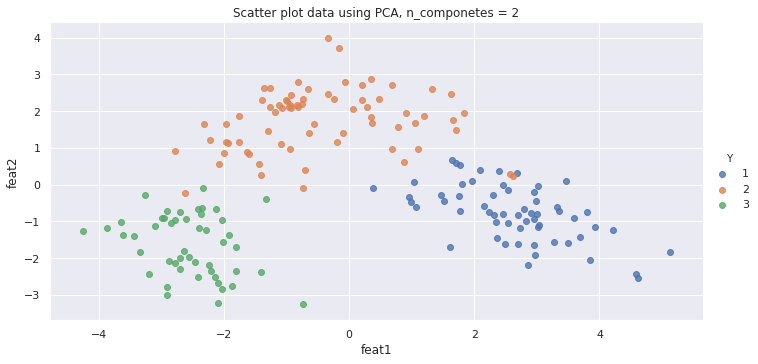

In [177]:

#scatter plot gerado com as features obtidas usando PCA
sns.lmplot(data=df2, x='feat1', y='feat2', hue='Y', fit_reg=False, aspect=2)
plt.title('Scatter plot data using PCA, n_componetes = {0}'.format(k))
plt.show()


<b>Realmente é interessante observar que nosso conjunto de dados contendo 13 features pode ser relativamente bem representado por apenas 2 features. Reparando no scatter plot acima é interessante perceber em como essas 2 features conseguem categorizar bem nossa label.</b>

Abaixo plotamos, de manual, três regiões que serão usadas para classificação de uma nova entrada de dados, como pode ser visto, se uma <b>entrada cair na parte superior será então classificada com label Y = 2</b>, <b>caindo na parte inferior esquerda será classificada com label Y = 3</b> e por por último, <b>caindo no canto inferior direito será classificada com label Y = 1</b>.<br><br>

Os ajustes para as posições das linhas que delimitam as regiões foram feitas de forma manual, ou seja, contém um pouco de arbritráriedade e não estão otimizadas.

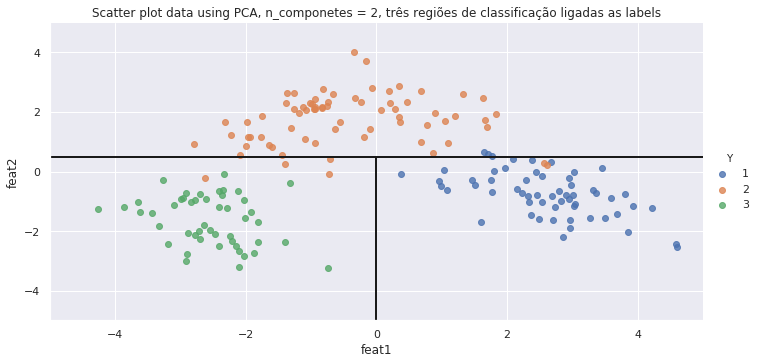

In [210]:

#scatter plot gerado com as features obtidas usando PCA

sns.lmplot(data=df2, x='feat1', y='feat2', hue='Y', fit_reg=False, aspect=2)
axe = plt.gca(); axe.set_xlim(-5,5); axe.set_ylim(-5,5)
plt.vlines(0, axe.get_ylim()[0],0.5, lw=2)
plt.hlines(0.5,axe.get_xlim()[0],axe.get_xlim()[1], lw=2)
plt.title('Scatter plot data using PCA, n_componetes = {0}, três regiões de classificação ligadas as labels'.format(k))
plt.show()




### Realizando um teste para um novo dado de entrada x

In [161]:

#Uma nova linha para os dados, o objetivo é tentar prever sua label
x = np.array([13.95, 3.65, 2.25, 18.4, 90.18, 1.55, 0.48, 0.5, 1.34, 10.2,  0.71, 1.48, 587.14])


#Padronizando x
z = []
for a in range(len(x)):
    mean = X.iloc[:,a].mean()
    std = X.iloc[:,a].std()
    z.append((x[a] - mean)/std)

z = np.array(z); # x padronizado

In [164]:

# gerando as componentes principais feat1 e feat2 para a nova linha de entrada x
# Para mais detalhes consulte também o problema exposto acima e [4]
feat1_x = np.sum(np.dot(pca.components_, z))
feat2_x = np.sum(np.dot(pca.components_, z))


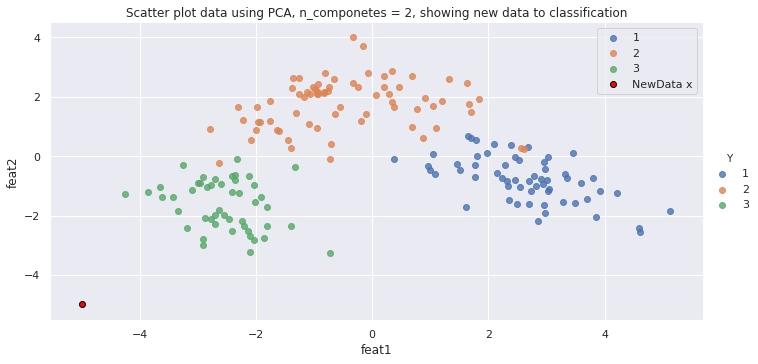

In [178]:

#scatter plot gerado com as features obtidas usando PCA
sns.lmplot(data=df2, x='feat1', y='feat2', hue='Y', fit_reg=False, aspect=2)
plt.scatter(x=feat1_x, y=feat2_x, color='red', label='NewData x', edgecolor='black')
plt.legend()
plt.title('Scatter plot data using PCA, n_componetes = {0}, showing new data to classification'.format(k))
plt.show()


<b>Observando o scatter plot acima, a nova amostra dos dados obtida, x, seria classificada com label = 3.</b>

## References

[1]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/LivroDeExerciciosFECD.pdf
<br>
[2]http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data Get data
<br>
[3]https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
<br>
[4]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/FECD.pdf
Cap. Análise de componentes principais e fatorial